In [1]:
import pandas as pd 

In [6]:
list_df = df.columns.to_list()

In [7]:
len(list_df)

254

/var/folders/rr/xzmk31h93kzbljw5qz6sd3gw0000gn/T/ipykernel_15790/2107288678.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


Explained variance ratio of the top 10 principal components:
[0.09224227 0.06449011 0.04825619 0.03924992 0.03356749 0.02760524
 0.0214587  0.02014267 0.0183256  0.01707756]


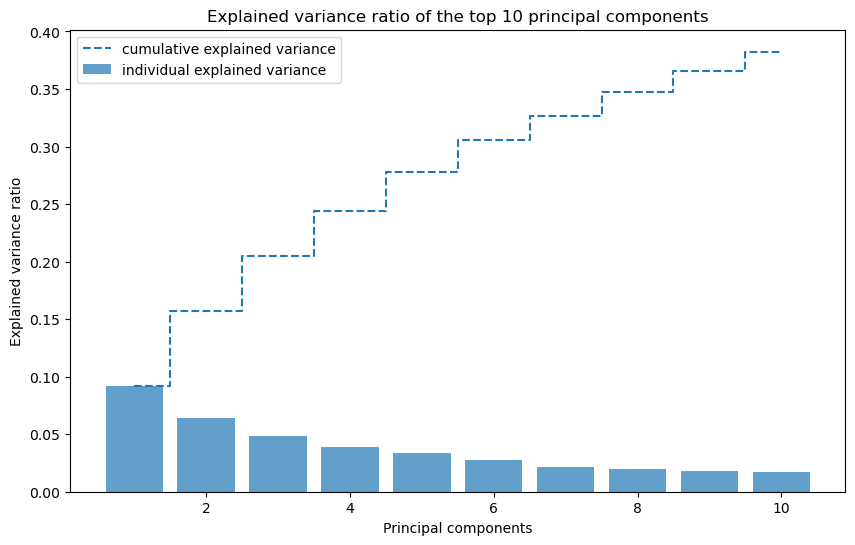

Top 10 principal components exported to data/semi_raw_data/30_pca_top_10_components.csv


In [13]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

raw_df = pd.read_csv('/Users/emi/Documents/GitHub/ROB-EDA/data/semi_raw_data/df_30percent_variance_exclusion.csv')


keeplist = ['Driving.Frequency', 'Age', 'Education', 'SES', 'Driving.Risk.General', 'CVSCALE.PD_Total', 'BFI.extraversion', 'Control_Total', 'Anxiety.As.Passenger', 'Risk.Willingness.General', 'Gender', 'BFI.conscientiousness', 'BFI.agreeableness', 'Info.processing_Total', 'CVSCALE.UA_Total', 'Politics', 'BFI.openness', 'CVSCALE.C_Total', 'Self.Esteem_Total', 'Overall.Risk.Benefit', 'NFC.Ambiguity_Total', 'BFI.neuroticism', 'NFC.Predictability_Total', 'NumOfCollisions', 'Risk.Benefit.Model_1', 'Risk.Benefit.Model_2', 'Risk.Benefit.Model_3', 'Risk.Benefit.Model_4', 'Risk.Benefit.Model_5', 'Risk.Benefit.Model_6', 'Risk.Benefit.Model_8', 'Risk.Benefit.Model_9', 'Risk.Benefit.Model_10', 'Risk.Benefit.Model_11', 'Risk.Benefit.Model_12', 'Risk.Benefit.Model_14', 'Risk.Benefit.Model_15',  'Risk.Benefit.Model_17', 'Composite.AV.Trust_16', 'Composite.AV.Trust_1', 'Composite.AV.Trust_3', 'Composite.AV.Trust_6', 'Composite.AV.Trust_22', 'AV.Priors_1', 'AV.Priors_2', 'AV.Priors_3', 'AV.Priors_4', 'AV.Priors_5', 'AV.Priors_6', 'AV.Priors_7', 'AV.Priors_8', 'AV.Priors_9', 'AV.Priors_10', 'AV.feasibility', 'Prior.AV.Exp', 'AV.Functions_1', 'AV.Functions_2', 'AV.Functions_3', 'AV.Functions_4', 'AV.Functions_5', 'AV.Functions_6', 'AV.Functions_7', 'AV.Functions_8', 'Trust.Institutions_1', 'Trust.Institutions_2', 'Trust.Institutions_3', 'Tech.Affinity_1', 'Tech.Affinity_2', 'Tech.Affinity_3', 'Tech.Affinity_4', 'Tech.self.efficacy_1', 'Tech.self.efficacy_2', 'Tech.self.efficacy_3', 'Tech.self.efficacy_4', 'Tech.self.efficacy_5', 'MDSI.Driving.Style_1', 'MDSI.Driving.Style_2', 'MDSI.Driving.Style_3', 'MDSI.Driving.Style_4', 'MDSI.Driving.Style_5', 'MDSI.Driving.Style_6', 'MDSI.Driving.Style_7', 'MDSI.Driving.Style_8', 'MDSI.Driving.Style_9', 'MDSI.Driving.Style_10', 'MDSI.Driving.Style_11', 'MDSI.Driving.Style_12', 'MDSI.Driving.Style_13', 'MDSI.Driving.Style_14', 'MDSI.Driving.Style_15', 'MDSI.Driving.Style_16', 'MDSI.Driving.Style_17', 'MDSI.Driving.Style_18', 'MDSI.Driving.Style_19', 'MDSI.Driving.Style_20', 'MDSI.Driving.Style_21', 'MDSI.Driving.Style_22', 'MDSI.Driving.Style_23', 'MDSI.Driving.Style_24', 'MDSI.Driving.Style_25', 'MDSI.Driving.Style_26', 'MDSI.Driving.Style_27', 'MDSI.Driving.Style_28', 'MDSI.Driving.Style_29', 'MDSI.Driving.Style_30', 'MDSI.Driving.Style_31', 'MDSI.Driving.Style_32', 'MDSI.Driving.Style_33', 'MDSI.Driving.Style_34', 'MDSI.Driving.Style_36', 'MDSI.Driving.Style_37', 'MDSI.Driving.Style_38', 'MDSI.Driving.Style_39', 'MDSI.Driving.Style_40', 'MDSI.Driving.Style_41', 'MDSI.Driving.Style_42', 'MDSI.Driving.Style_43', 'Driving.Cognitions_1', 'Driving.Cognitions_2', 'Driving.Cognitions_3', 'Driving.Cognitions_4', 'Driving.Cognitions_5', 'Driving.Cognitions_6', 'Driving.Cognitions_7', 'Driving.Cognitions_8', 'Driving.Cognitions_9', 'Driving.Cognitions_10', 'Driving.Cognitions_11', 'Driving.Cognitions_12', 'Driving.Cognitions_13']

df = raw_df[keeplist]

df.dropna(axis=0, inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA(n_components=10)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(10)])

explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio of the top 10 principal components:")
print(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.7, align='center', label='individual explained variance')
plt.step(range(1, 11), explained_variance.cumsum(), where='mid', linestyle='--', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained variance ratio of the top 10 principal components')
plt.show()

pca_df['Composite.Trust.Narrow.Combined'] = raw_df['Composite.Trust.Narrow.Combined']

#export 
output_path = 'data/semi_raw_data/30_pca_top_10_components.csv'
pca_df.to_csv(output_path, index=False)
print(f"Top 10 principal components exported to {output_path}")


/var/folders/rr/xzmk31h93kzbljw5qz6sd3gw0000gn/T/ipykernel_17647/1367588935.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(axis=0, inplace=True)


Top contributing feature loads for LD1:
Overall.Risk.Benefit     3.495662
Risk.Benefit.Model_1     2.012876
Composite.AV.Trust_16    1.699459
Risk.Benefit.Model_17    1.436427
AV.feasibility           1.431107
Tech.self.efficacy_3     1.409129
Risk.Benefit.Model_14    1.333297
AV.Priors_4              1.238177
Composite.AV.Trust_1     1.214526
AV.Priors_10             1.142062
Name: LD1, dtype: float64
-----------------------------------------
Top contributing feature loads for LD2:
Overall.Risk.Benefit     2.578635
Composite.AV.Trust_22    1.984882
Risk.Benefit.Model_1     1.776588
AV.feasibility           1.632465
Risk.Benefit.Model_6     1.632401
Composite.AV.Trust_16    1.460224
Tech.Affinity_2          1.430796
Composite.AV.Trust_6     1.359712
Risk.Benefit.Model_9     1.245401
Trust.Institutions_2     1.131133
Name: LD2, dtype: float64
-----------------------------------------
Top contributing feature loads for LD3:
Overall.Risk.Benefit        2.935894
Risk.Benefit.Model_1       

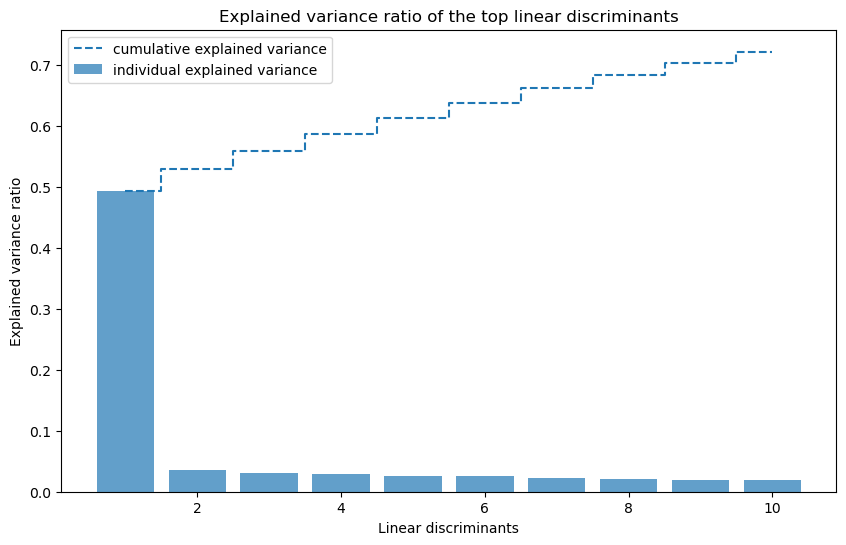

Top linear discriminants exported to data/semi_raw_data/0_lda_top_components.csv


In [6]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


raw_df = pd.read_csv('/Users/emi/Documents/GitHub/ROB-EDA/data/semi_raw_data/df_0percent_variance_exclusion.csv')

keeplist = ['Driving.Frequency', 'Age', 'Education', 'SES', 'Driving.Risk.General', 'CVSCALE.PD_Total', 'BFI.extraversion', 
            'Control_Total', 'Anxiety.As.Passenger', 'Risk.Willingness.General', 'Gender', 'BFI.conscientiousness', 
            'BFI.agreeableness', 'Info.processing_Total', 'CVSCALE.UA_Total', 'Politics', 'BFI.openness', 
            'CVSCALE.C_Total', 'Self.Esteem_Total', 'Overall.Risk.Benefit', 'NFC.Ambiguity_Total', 'BFI.neuroticism', 
            'NFC.Predictability_Total', 'NumOfCollisions', 'Risk.Benefit.Model_1', 'Risk.Benefit.Model_2', 
            'Risk.Benefit.Model_3', 'Risk.Benefit.Model_4', 'Risk.Benefit.Model_5', 'Risk.Benefit.Model_6', 
            'Risk.Benefit.Model_8', 'Risk.Benefit.Model_9', 'Risk.Benefit.Model_10', 'Risk.Benefit.Model_11', 
            'Risk.Benefit.Model_12', 'Risk.Benefit.Model_14', 'Risk.Benefit.Model_15',  'Risk.Benefit.Model_17', 
            'Composite.AV.Trust_16', 'Composite.AV.Trust_1', 'Composite.AV.Trust_3', 'Composite.AV.Trust_6', 
            'Composite.AV.Trust_22', 'AV.Priors_1', 'AV.Priors_2', 'AV.Priors_3', 'AV.Priors_4', 'AV.Priors_5', 
            'AV.Priors_6', 'AV.Priors_7', 'AV.Priors_8', 'AV.Priors_9', 'AV.Priors_10', 'AV.feasibility', 'Prior.AV.Exp', 
            'AV.Functions_1', 'AV.Functions_2', 'AV.Functions_3', 'AV.Functions_4', 'AV.Functions_5', 'AV.Functions_6', 
            'AV.Functions_7', 'AV.Functions_8', 'Trust.Institutions_1', 'Trust.Institutions_2', 'Trust.Institutions_3', 
            'Tech.Affinity_1', 'Tech.Affinity_2', 'Tech.Affinity_3', 'Tech.Affinity_4', 'Tech.self.efficacy_1', 
            'Tech.self.efficacy_2', 'Tech.self.efficacy_3', 'Tech.self.efficacy_4', 'Tech.self.efficacy_5', 
            'MDSI.Driving.Style_1', 'MDSI.Driving.Style_2', 'MDSI.Driving.Style_3', 'MDSI.Driving.Style_4', 
            'MDSI.Driving.Style_5', 'MDSI.Driving.Style_6', 'MDSI.Driving.Style_7', 'MDSI.Driving.Style_8', 
            'MDSI.Driving.Style_9', 'MDSI.Driving.Style_10', 'MDSI.Driving.Style_11', 'MDSI.Driving.Style_12', 
            'MDSI.Driving.Style_13', 'MDSI.Driving.Style_14', 'MDSI.Driving.Style_15', 'MDSI.Driving.Style_16', 
            'MDSI.Driving.Style_17', 'MDSI.Driving.Style_18', 'MDSI.Driving.Style_19', 'MDSI.Driving.Style_20', 
            'MDSI.Driving.Style_21', 'MDSI.Driving.Style_22', 'MDSI.Driving.Style_23', 'MDSI.Driving.Style_24', 
            'MDSI.Driving.Style_25', 'MDSI.Driving.Style_26', 'MDSI.Driving.Style_27', 'MDSI.Driving.Style_28', 
            'MDSI.Driving.Style_29', 'MDSI.Driving.Style_30', 'MDSI.Driving.Style_31', 'MDSI.Driving.Style_32', 
            'MDSI.Driving.Style_33', 'MDSI.Driving.Style_34', 'MDSI.Driving.Style_36', 'MDSI.Driving.Style_37', 
            'MDSI.Driving.Style_38', 'MDSI.Driving.Style_39', 'MDSI.Driving.Style_40', 'MDSI.Driving.Style_41', 
            'MDSI.Driving.Style_42', 'MDSI.Driving.Style_43', 'Driving.Cognitions_1', 'Driving.Cognitions_2', 
            'Driving.Cognitions_3', 'Driving.Cognitions_4', 'Driving.Cognitions_5', 'Driving.Cognitions_6', 
            'Driving.Cognitions_7', 'Driving.Cognitions_8', 'Driving.Cognitions_9', 'Driving.Cognitions_10', 
            'Driving.Cognitions_11', 'Driving.Cognitions_12', 'Driving.Cognitions_13', 'Composite.Trust.Narrow.Combined']

df = raw_df[keeplist]

df.dropna(axis=0, inplace=True)

X = df.drop(columns=['Composite.Trust.Narrow.Combined'])
y = df['Composite.Trust.Narrow.Combined']

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=10)
lda_result = lda.fit_transform(scaled_X, y)

lda_df = pd.DataFrame(lda_result, columns=[f'LD{i+1}' for i in range(lda_result.shape[1])])

# Feature loadings 
loadings_df = pd.DataFrame(lda.coef_.T, index = X.columns, columns = [f'LD{i+1}' for i in range(lda.coef_.shape[0])])

for i in range(loadings_df.shape[1]):
    print(f'Top contributing feature loads for LD{i+1}:')
    loadings_in_order = loadings_df.iloc[:, i].abs().sort_values(ascending = False) #check i+1 and i-1 to make sure its correct 
    print(loadings_in_order.head(10))
    print('-----------------------------------------')


explained_variance = lda.explained_variance_ratio_
print("Explained variance ratio of the top 10 linear discriminants:")
print(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', label='individual explained variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', linestyle='--', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Linear discriminants')
plt.legend(loc='best')
plt.title('Explained variance ratio of the top linear discriminants')
plt.show()

lda_df['Composite.Trust.Narrow.Combined'] = y.reset_index(drop=True)


# Exporting all of the dfs 
output_path = 'data/semi_raw_data/0_lda_top_components.csv'
#lda_df.to_csv(output_path, index=False)
print(f"Top linear discriminants exported to {output_path}")



